Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [72]:
NAME = "Jing Wang"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [73]:
# Here are all imports that I will use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.model_selection import LeaveOneOut
#from sklearn.model_selection import LeavePOut
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [74]:
#Q3 Import the Iris data,assign column names
cols=['sepal length','sepal width','petal length','petal width','class']
iris = pd.read_csv('iris.data', sep=',',names=cols)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
#Q4 Look at 5 records
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


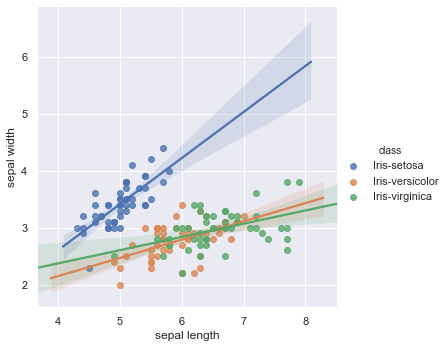

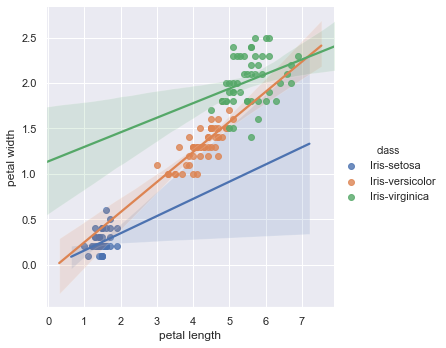

In [76]:
#Q4 Scatter plot sepal_width vs sepal_length and petal_width vs petal_length, and different class with different color
sns.set(color_codes=True)
g = sns.lmplot(x="sepal length", y="sepal width",hue='class', data=iris)
g1 = sns.lmplot(x="petal length", y="petal width",hue='class', data=iris)

In [77]:
#Q5 before split into train and x, need to convert class from  the categorical into numerical 
# assign with columns for x, which columns for y
###Need to convert the categorical 
lb_make = LabelEncoder()
iris['class_int']= lb_make.fit_transform(iris['class'])
iris.head()
y=iris['class_int']
y=y.to_numpy()  #make it to be array
x=iris.iloc[:,0:4] 
x=x.to_numpy()  #make it to be array

In [120]:
#Q6
#split the whole data into 30% test data, 70% train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [121]:
#Q7 Run the fit using KNeighborsClassifier from sklearn.neighbors
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [122]:
#Q8 Predict the class from features
y_pred=model.predict(x_test)


# get accuracy socore of the prediction
from sklearn.metrics import accuracy_score
accuracyscore=accuracy_score(y_test, y_pred)
print(accuracyscore)

0.9777777777777777


In [123]:
#Prediction output
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [124]:
#Actual output(y value from test)
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [125]:
predict_correct=(y_test==y_pred)

In [126]:
predict_wrong=(y_test!=y_pred)

In [127]:
np.count_nonzero(predict_correct)
#44 are predicted correctly

44

In [128]:
np.count_nonzero(predict_wrong)
#1 is predicted wrongly

1

In [97]:
#Q9 accuracy scor and # of correct predictions based on # of neighbors k: 1,3,5,7,10,20,30,40,50
from sklearn import model_selection

k_values = [1,3,5,7,10,20,30,40,50]
scoreall = []
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


for k in k_values:
        #kfold=model_selection.KFold(n_splits=10,random_state=100)
        ##model_kfold=KNeighborsClassifier
        scoreall.append(cross_val_score(KNeighborsClassifier(n_neighbors=k),x,y,cv=10))
        
        
        #kfold=model_selection.KFold(n_splits=10,random_state=100)
        ##model_kfold=KNeighborsClassifier
        #scoreall.append(cross_val_score(KNeighborsClassifier(n_neighbors=k),x,y,cv=kfold).mean())


score_all=pd.DataFrame(scoreall).T
score_all.columns=k_values

# # of data
size=iris['class'].count()

#Average Score for each k
AverageScore=score_all.mean()
print(AverageScore)

#Average number of correct predictions for each k
AverageCorrectPrediction=AverageScore*size
AverageScore.head(10)
print(AverageCorrectPrediction)

1     0.960000
3     0.946667
5     0.933333
7     0.933333
10    0.933333
20    0.920000
30    0.906667
40    0.880000
50    0.853333
dtype: float64
1     144.0
3     142.0
5     140.0
7     140.0
10    140.0
20    138.0
30    136.0
40    132.0
50    128.0
dtype: float64


Text(0, 0.5, 'Accuracy Score')

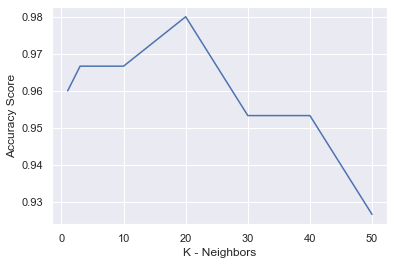

In [92]:
# plot the different K and testing accuracy

plt.plot(AverageScore)
#plt.plot(k_values, scores)
plt.xlabel('K - Neighbors')
plt.ylabel('Accuracy Score')

In [ ]:
#Conclusion from Graph: K Neighbors 20 is the optimal value for K_Neighbors